In [1]:
import os, math, emerge_classes
from dynamixel_sdk import *                    # Uses Dynamixel SDK library
from joint_handler import *
from zmqRemoteApi import RemoteAPIClient

from random import randint as ri
from random import uniform as ru

In [2]:
isSim = False
if isSim:
    cluster = False
    setup = Sim_setup(cluster)
    client = RemoteAPIClient('localhost', setup.port_conection)
    sim = client.getObject('sim')
    jointHandler = JointHandler(isSim, client, sim)
else:
    setup = EMERGE_setup()
    portHandler = PortHandler(setup.DEVICENAME)
    packetHandler = PacketHandler(setup.PROTOCOL_VERSION)
    jointHandler = JointHandler(isSim, portHandler, packetHandler)

In [ ]:
jointHandler.loadEMERGE()

In [ ]:
test_pos = [-math.pi/4,0,math.pi/4,0]
pos = 0
incr = 7.5*math.pi/180
i = 0
for i in range(5):
    post = post + incr
    jointHandler.setJointTargetPosition(12,post)

In [ ]:
jointHandler.unloadEMERGE()

### Generacion de Perfiles

In [32]:
def funcion_trapezoidal(progress, valor_minimo, valor_maximo):
    p1 = 0.3
    p2 = 0.7
    p3 = 1
    # Remaining percentage to goal
    if progress <= p1:
        x = progress
        m = (valor_maximo-valor_minimo)/p1
        b = valor_minimo
        velocity = x * m + b
    elif p1 < progress and progress < p2:
        x = progress
        m = ((4/5*valor_maximo)-valor_maximo)/(p2-p1)
        b = valor_maximo - p1* m
        velocity = x * m + b
    else:
        x = progress
        m = (valor_minimo-(4/5*valor_maximo))/(p3-p2)
        b = valor_minimo - p3* m
        velocity = x * m + b
    return round(velocity)

# Ejemplo de uso:
x_0 = 0
x_1 = 0.3
x_2 = 0.7
x_3 = 1
valor_minimo = 200
valor_maximo = 600

resultado_0 = funcion_trapezoidal(x_0, valor_minimo, valor_maximo)
resultado_1 = funcion_trapezoidal(x_1, valor_minimo, valor_maximo)
resultado_2 = funcion_trapezoidal(x_2, valor_minimo, valor_maximo)
resultado_3 = funcion_trapezoidal(x_3, valor_minimo, valor_maximo)

print(f"f({x_0}) = {resultado_0}")
print(f"f({x_1}) = {resultado_1}")
print(f"f({x_2}) = {resultado_2}")
print(f"f({x_3}) = {resultado_3}")

f(0) = 200
f(0.3) = 600
f(0.7) = 480
f(1) = 200


In [33]:
import numpy as np
import matplotlib.pyplot as plt
valor_minimo = 200
valor_maximo = 600

x = np.arange(0, 1.1, 0.1).tolist()
y = [funcion_trapezoidal(i, valor_minimo, valor_maximo) for i in x]

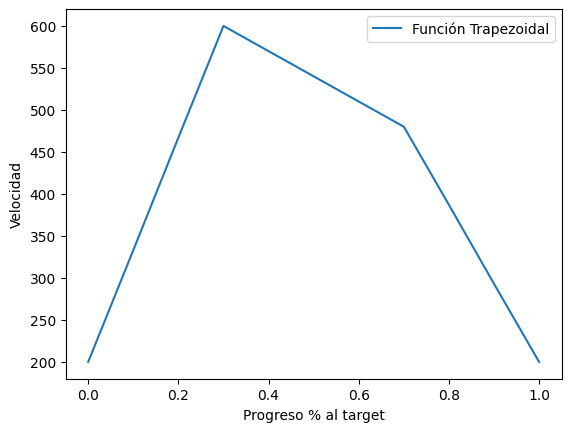

In [34]:
plt.figure()
plt.plot(x,y, label='Función Trapezoidal')
plt.xlabel('Progreso % al target')
plt.ylabel('Velocidad')
plt.legend()
plt.show()